# Valores de Imóveis em São Paulo

## Inicialização do dataframe

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set()

dados_vendas_censo = pd.read_csv('https://raw.githubusercontent.com/pedrogrigorio/Data-Immersion-Alura/main/Materiais/dados_vendas_censo.csv')
dados_vendas_censo = dados_vendas_censo[['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor_anuncio', 'Valor_mm', 'Valor_m2', 'latitude', 'longitude', 'Situacao_setor', 'V001','V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010', 'V011', 'V012']].dropna()
dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38,3040.00,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,0.54,5400.00,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,1.98,4500.00,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.00,0.96,6114.65,...,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,1.50,5617.98,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,0.67,7000.00,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,1.05,5121.95,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


## Visualizando e tratando alguns dados

Plotando um gráfico para o valor dos imóveis, percebemos que alguns outliers estão afetando drasticamente nossas análises.

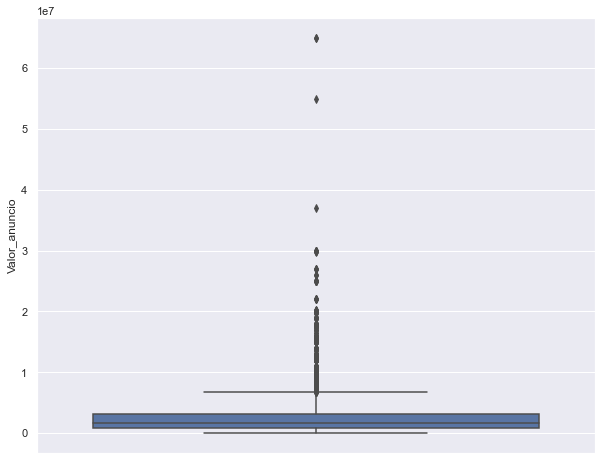

In [27]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data = dados_vendas_censo, y="Valor_anuncio")
plt.show()

Filtrando nosso dataframe para remover os outliers.

In [28]:
dados_vendas_censo.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
54,Rua Inglaterra,Jardim Europa,São Paulo,200,3,3,2,13000.00,0.01,65.00,...,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67,882338714.47,15470.93,1168079134.43
89,Rua Inglaterra,Jardim Europa,São Paulo,756,5,4,10,37000000.00,37.00,48941.80,...,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67,882338714.47,15470.93,1168079134.43
1032,Praça Nicolau Scarpa,Jardim América,São Paulo,1200,4,4,25,65000000.00,65.00,54166.67,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57
3521,Rua Estados Unidos,Jardim América,São Paulo,1816,4,10,20,55000000.00,55.00,30286.34,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57
3896,Rua Estados Unidos,Jardim América,São Paulo,1200,4,6,24,65000000.00,65.00,54166.67,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57


Plotando o gráfico após o filtro, percebemos que a visualização melhorou significativamente.

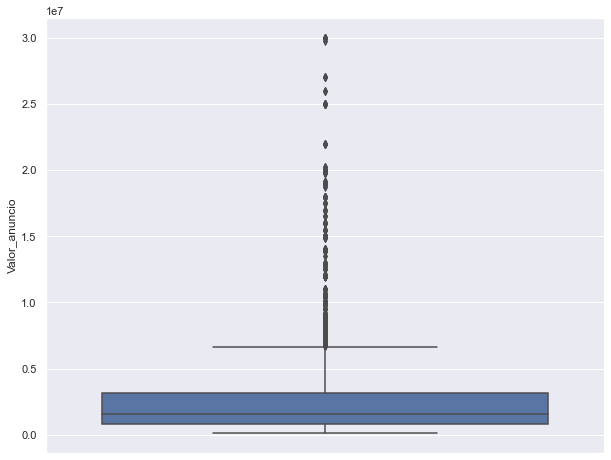

In [29]:
dados_vendas_censo.drop(dados_vendas_censo.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000").index, inplace = True)
plt.figure(figsize=(10,8))
ax = sns.boxplot(data = dados_vendas_censo, y = "Valor_anuncio")
plt.show()

<AxesSubplot:xlabel='Valor_anuncio', ylabel='Valor_m2'>

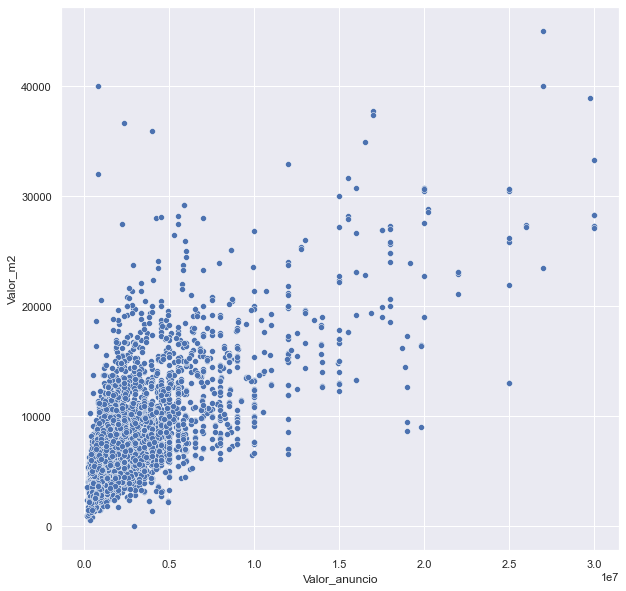

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = dados_vendas_censo, x="Valor_anuncio", y="Valor_m2")

## Correlação dos dados

In [31]:
dados_vendas_censo.corr()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,latitude,longitude,Situacao_setor,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
Metragem,1.00,0.23,0.23,0.27,0.30,0.30,0.06,-0.09,-0.13,0.48,...,0.13,0.05,0.22,0.07,0.23,0.05,0.20,0.07,0.21,0.05
Quartos,0.23,1.00,0.55,0.42,0.37,0.37,0.12,-0.01,-0.19,-0.01,...,0.16,0.07,0.32,0.12,0.33,0.11,0.31,0.13,0.32,0.11
Banheiros,0.23,0.55,1.00,0.46,0.47,0.47,0.22,-0.03,-0.25,-0.03,...,0.21,0.07,0.41,0.11,0.41,0.08,0.39,0.11,0.40,0.08
Vagas,0.27,0.42,0.46,1.00,0.48,0.48,0.15,-0.04,-0.19,-0.01,...,0.24,0.09,0.34,0.11,0.34,0.08,0.32,0.12,0.33,0.09
Valor_anuncio,0.30,0.37,0.47,0.48,1.00,1.00,0.70,0.02,-0.21,-0.00,...,0.13,0.08,0.45,0.11,0.45,0.07,0.47,0.13,0.45,0.08
Valor_mm,0.30,0.37,0.47,0.48,1.00,1.00,0.70,0.02,-0.21,-0.00,...,0.13,0.08,0.45,0.11,0.45,0.07,0.47,0.13,0.45,0.08
Valor_m2,0.06,0.12,0.22,0.15,0.70,0.70,1.00,0.05,-0.18,-0.03,...,-0.13,0.01,0.29,0.04,0.28,0.02,0.37,0.05,0.32,0.02
latitude,-0.09,-0.01,-0.03,-0.04,0.02,0.02,0.05,1.00,0.15,-0.03,...,-0.05,0.03,-0.05,-0.09,-0.07,-0.07,-0.04,-0.07,-0.07,-0.06
longitude,-0.13,-0.19,-0.25,-0.19,-0.21,-0.21,-0.18,0.15,1.00,-0.01,...,-0.05,0.02,-0.36,-0.10,-0.36,-0.07,-0.38,-0.10,-0.37,-0.07
Situacao_setor,0.48,-0.01,-0.03,-0.01,-0.00,-0.00,-0.03,-0.03,-0.01,1.00,...,0.03,0.00,-0.03,-0.01,-0.03,-0.01,-0.04,-0.01,-0.03,-0.00


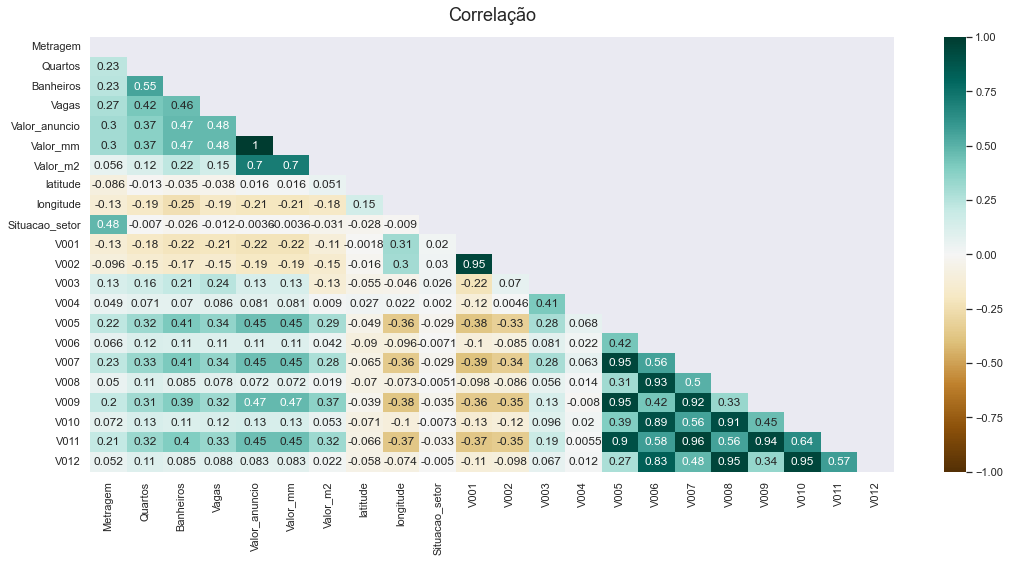

In [32]:
plt.figure(figsize=(18,8))
mask = np.triu(np.ones_like(dados_vendas_censo.corr(), dtype=bool))
heatmap = sns.heatmap(dados_vendas_censo.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

## Machine Learning

### Implementação do modelo

X é a variável onde guardamos nosso vetor de atributos utilizados para predizer Y, que é o valor do imóvel. Nesse sentido, utilizamos o método `train_test_split()` para dividir nossos dados em dados de treino e de teste, passando como parâmetro nossas variáveis, a quantidade de dados para teste (nesse caso 25%, que é o padrão do método) e um parâmetro `random_state` que serve para setar um caso de aleatorização, afim de testar nossas alterações no mesmo conjunto aleatório de dados, para que não haja discrepâncias entre testes. 

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = dados_vendas_censo[["Metragem"]]
Y = dados_vendas_censo["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr = LinearRegression()

No método acima criamos 4 variáveis, X_train, que recebe a quantidade de dados para treinamento, Y_train que é são as respostas para esses dados de treinamento e X_test e Y_test, que são os dados para teste, sendo X_test os dados que serão utilizados para predizer Y_test. Nesse sentido, podemos plotar quais são esses dados.

In [34]:
X_train

,Metragem
3522,105
881,240
769,324
3364,484
4674,103
...,...
3558,397
3994,224
5432,238
4044,300


In [35]:
Y_train

3522    692000.00
881    1490000.00
769    2100000.00
3364   6700000.00
4674    622500.00
          ...    
3558   4280000.00
3994   1500000.00
5432   2300000.00
4044   1600000.00
948    3280000.00
Name: Valor_anuncio, Length: 3977, dtype: float64

Agora iremos treinar nosso modelo, utilizando o método `lr.fit()`, passando como parâmetro nossas variáveis de treino.

In [36]:
lr.fit(X_train, Y_train)

LinearRegression()

Após treinar, utilizamos o método `lr.predict()`, passando nossos dados de teste, exceto, claro, nossos dados Y_test, visto que eles devem ser previstos.

In [37]:
Y_predict_test = lr.predict(X_test)
Y_predict_test

array([4535135.54576314, 2319529.74583429, 2424501.59358835, ...,
       2802400.24550293, 2483285.82833061, 2854186.3570616 ])

Podemos plotar os dados Y_test para comparar os resultados e verificar se o modelo teve um bom resultado.

In [38]:
Y_test

172    4500000.00
4513    345000.00
4865    800000.00
4979   4000000.00
1255   5100000.00
          ...    
5240   1600000.00
4472    580000.00
3291   2200000.00
432    1500000.00
2455   2800000.00
Name: Valor_anuncio, Length: 1326, dtype: float64

Podemos também, tentar predizer os dados de treino, que são os dados que o modelo já viu e, teóricamente, ele já saberia os resultados.

In [39]:
Y_predict_train = lr.predict(X_train)
Y_predict_train

array([2382512.85448673, 2571462.18044402, 2689030.64992855, ...,
       2568662.93117058, 2655439.65864726, 2495882.4500611 ])

Comparando os resultados, percebemos que ele se saiu bem pior. Nesse sentido, isso ocorre pois ele tenta encontrar uma reta que melhor se adeque aos dados, porém para os dados de treino, essa reta não foi suficientemente boa.

In [40]:
Y_train

3522    692000.00
881    1490000.00
769    2100000.00
3364   6700000.00
4674    622500.00
          ...    
3558   4280000.00
3994   1500000.00
5432   2300000.00
4044   1600000.00
948    3280000.00
Name: Valor_anuncio, Length: 3977, dtype: float64

### Verificando outras métricas

Algumas vezes, ficar comparando os dados preditos com os valores reais fica ruim de visualizar a eficiência do modelo. Por isso, temos algumas métricas úteis, como o `mean_absolute_error()`, que nos diz a soma da diferença entre os valores reais e previstos (como se fosse a quantidade de erros), e o 
`r2_score()`(r²), que nos dá a porcentagem do quão acertivo o modelo foi. Ou seja, na primeira métrica, quanto maior o valor pior, na segunda métrica, quando mais perto de 1 melhor, enquanto que, para números negativos nesta segunda métrica, significa que nosso modelo está regredindo.

In [41]:
from sklearn.metrics import mean_absolute_error, r2_score

mean_absolute_error(Y_test, Y_predict_test)

1770626.9062636306

In [42]:
r2_score(Y_test, Y_predict_test)

0.1298305754042075

In [43]:
mean_absolute_error(Y_train, Y_predict_train)

1825220.303454906

In [44]:
r2_score(Y_train, Y_predict_train)


0.07399685087721253

Com as métricas acima, percebemos que nosso modelo está muito pouco acertivo quando comparamos apenas a Metragem. Nesse sentido, agora iremos adicionar outros atributos e verificar seu desempenho.

In [45]:
X = dados_vendas_censo[["Metragem", "Quartos", "Banheiros", "Vagas", "latitude", "longitude", "Situacao_setor", "V001", "V002", "V003", "V004", "V005", "V006", "V007", "V008", "V009", "V010", "V011", "V012"]]
Y = dados_vendas_censo["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)

lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)

mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

Verificando as métricas, percebemos que teve uma grande melhora, mas ainda longe do ideal, onde nosso r², por exemplo, está chegando em 40% de acertividade.

In [46]:
mae_test

1333549.3273845937

In [47]:
r2_test

0.40346952482988363

In [48]:
mae_train

1336869.5575067613

In [49]:
r2_train

0.4284216741510203

### Gráfico

Plotando um gráfico que nos dá uma ideia do valor real pelo valor previsto.

<AxesSubplot:xlabel='Valor_anuncio'>

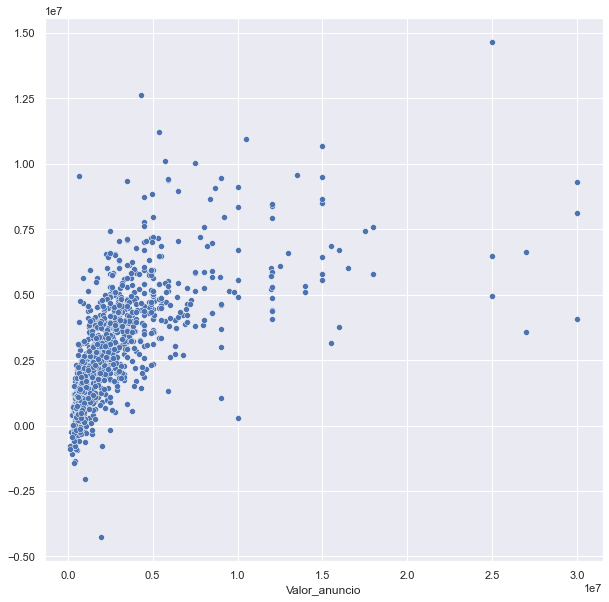

In [50]:
plt.figure(figsize=(10,10))
sns.scatterplot(x= Y_test, y= Y_predict_test)

## Desafios

* Adicionar o valor "real" do m² do imóvel.

* Testar outro modelo de regressão.

* Criar um modelo baseline com as features originais.

* Trabalhar mais nos dados e criar novas variáveis.

* Testar as predições para casos reais.

* Criar um projeto com os resultados da Imersão e postar nas redes sociais mostrando o trabalho realizado. Lembre-se de marcar a @AluraOnline e utilizar as hashtags #ImersãoDados e #ImersãoDados4.